In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from pandas.tools.plotting import scatter_matrix
import json 
import os
import imp
import networkx as nx
from collections import Counter
import itertools as it
import seaborn as sns
# sns.set()
sns.set_style("white")
sns.set_style("ticks") 
%load_ext autoreload

import matplotlib.pyplot as plt
%matplotlib inline
import random

In [2]:
import pickle
import glob
dfsl=[]
# filedir="/home/mosesboudourides/Dropbox/GradRes/DiplwmatikiGP/dataframes"
filedir="/home/dell/Dropbox/GradRes/DiplwmatikiGP/dataframes"
dffs_files=['/home/dell/Dropbox/GradRes/DiplwmatikiGP/dataframes/df2_2_2',
'/home/dell/Dropbox/GradRes/DiplwmatikiGP/dataframes/df3_2_2',
'/home/dell/Dropbox/GradRes/DiplwmatikiGP/dataframes/df4_2_2',
'/home/dell/Dropbox/GradRes/DiplwmatikiGP/dataframes/df5_2_2',
'/home/dell/Dropbox/GradRes/DiplwmatikiGP/dataframes/df6_2_2',
'/home/dell/Dropbox/GradRes/DiplwmatikiGP/dataframes/df7_2_2']
# glob.glob(os.path.join(filedir,'*'))
    
print dffs_files
dfs = []
for filna in dffs_files:
    with (open(filna, "rb")) as openfile:
        while True:
            try:
                dfs.append(pickle.load(openfile))
            except EOFError:
                break

['/home/dell/Dropbox/GradRes/DiplwmatikiGP/dataframes/df2_2_2', '/home/dell/Dropbox/GradRes/DiplwmatikiGP/dataframes/df3_2_2', '/home/dell/Dropbox/GradRes/DiplwmatikiGP/dataframes/df4_2_2', '/home/dell/Dropbox/GradRes/DiplwmatikiGP/dataframes/df5_2_2', '/home/dell/Dropbox/GradRes/DiplwmatikiGP/dataframes/df6_2_2', '/home/dell/Dropbox/GradRes/DiplwmatikiGP/dataframes/df7_2_2']


In [3]:
print dfs[0].head(1)
print dfs[1].head(1)
print dfs[2].head(1)
print dfs[3].head(1)
print dfs[4].head(1)
print dfs[5].head(1)


  Cut Mentions Graph   Density  Density in terms of Weight  cut-off values
0                G_1  0.000039                8.840048e-07               1
  Cut Mention Graph     Slope  Logarithmic Slope  cut-off values
0               G_1 -0.004659          -0.000239               1
  cut mention graph  in-degree centralization  out-degree centralization  \
0               G_1                366.080865                 244.075753   

   betweenness centralization  closeness centralization  \
0                         0.0                244.075753   

   eigenvector centralization  katz centralization  pagerank centralization  \
0                         0.0         10061.657846               194.724366   

   cut-off values  
0               1  
  cut mention graph  degree assortativity coefficient  cut-off values
0               G_1                         -0.096938               1
  cut mention graph  number of strongly connected components  \
0               G_1                          

In [4]:
mydf=dfs[0].join(dfs[1][['Slope','Logarithmic Slope']])
mydf=mydf.join(dfs[2][['in-degree centralization','out-degree centralization','betweenness centralization','closeness centralization',
                       'eigenvector centralization','pagerank centralization']])
mydf=mydf.join(dfs[3][['degree assortativity coefficient']])
mydf=mydf.join(dfs[4][['number of strongly connected components','number of weakly connected components', 'number of attracting components']])
mydf=mydf.join(dfs[5][['communities','modularity']])
mydf=mydf.sort(['cut-off values'], ascending=[True])
mydf=mydf[['Cut Mentions Graph','cut-off values','Density','Density in terms of Weight',
          'Logarithmic Slope','Slope','in-degree centralization','out-degree centralization','betweenness centralization',
          'closeness centralization','eigenvector centralization','pagerank centralization',
          'degree assortativity coefficient','number of strongly connected components','number of weakly connected components',
           'number of attracting components','communities',
           'modularity']]
mydf

,Cut Mentions Graph,cut-off values,Density,Density in terms of Weight,Logarithmic Slope,Slope,in-degree centralization,out-degree centralization,betweenness centralization,closeness centralization,eigenvector centralization,pagerank centralization,degree assortativity coefficient,number of strongly connected components,number of weakly connected components,number of attracting components,communities,modularity
0,G_1,1,0.000039,8.840048e-07,-0.000239,-0.004659,366.080865,244.075753,0.0,244.075753,0.0,194.724366,-0.096938,23868,3440,9275,3503.0,0.942804
1,G_2,2,0.000410,1.854329e-05,-0.002057,-0.015180,56.057700,54.056852,0.0,54.056852,0.0,31.074709,-0.130626,2358,429,1103,459.0,0.929842
2,G_3,3,0.001184,8.619224e-05,-0.004524,-0.018525,15.169680,17.172462,0.0,17.172462,0.0,9.380854,-0.129394,720,168,351,183.0,0.950876
3,G_4,4,0.002125,2.217338e-04,-0.007457,-0.024340,9.282857,10.285714,0.0,10.285714,0.0,4.678904,-0.089751,351,100,178,105.0,0.965241
4,G_5,5,0.003102,4.442340e-04,-0.008280,-0.019435,5.390244,5.390244,0.0,5.390244,0.0,3.440977,-0.074838,206,77,105,77.0,0.966862
5,G_6,6,0.005847,1.038243e-03,-0.015227,-0.034987,5.392857,3.375000,0.0,3.375000,0.0,3.377405,-0.105821,113,41,55,42.0,0.947192
6,G_7,7,0.008159,1.738262e-03,-0.018662,-0.036154,3.415584,3.415584,0.0,3.415584,0.0,2.197750,-0.117335,78,30,40,30.0,0.936180
7,G_8,8,0.012245,3.346939e-03,-0.028979,-0.057784,3.469388,1.428571,0.0,1.428571,0.0,2.172481,-0.299187,50,20,25,20.0,0.909625
18,G_9,9,0.016517,5.300300e-03,-0.036752,-0.072406,3.500000,1.444444,0.0,1.444444,0.0,2.199296,-0.356348,37,15,19,15.0,0.884382
9,G_10,10,0.019841,7.671958e-03,-0.042254,-0.076923,2.555556,0.481481,0.0,0.481481,0.0,1.496412,NaN,28,13,13,13.0,0.867753


In [5]:
mydf.columns=['Cut Mentions Graph','Cut-off Values','Density','Density in terms of Weight',
          'Logarithmic Slope','Slope','In-Degree Centralization','Out-Degree Centralization','Betweenness Centralization',
          'Closeness Centralization','Eigenvector Centralization','Pagerank Centralization',
          'Degree Assortativity Coefficient','Number of Strongly Connected Components','Number of Weakly Connected Components',
           'Number of Attracting Components','Communities',
           'Modularity']
mydf

,Cut Mentions Graph,Cut-off Values,Density,Density in terms of Weight,Logarithmic Slope,Slope,In-Degree Centralization,Out-Degree Centralization,Betweenness Centralization,Closeness Centralization,Eigenvector Centralization,Pagerank Centralization,Degree Assortativity Coefficient,Number of Strongly Connected Components,Number of Weakly Connected Components,Number of Attracting Components,Communities,Modularity
0,G_1,1,0.000039,8.840048e-07,-0.000239,-0.004659,366.080865,244.075753,0.0,244.075753,0.0,194.724366,-0.096938,23868,3440,9275,3503.0,0.942804
1,G_2,2,0.000410,1.854329e-05,-0.002057,-0.015180,56.057700,54.056852,0.0,54.056852,0.0,31.074709,-0.130626,2358,429,1103,459.0,0.929842
2,G_3,3,0.001184,8.619224e-05,-0.004524,-0.018525,15.169680,17.172462,0.0,17.172462,0.0,9.380854,-0.129394,720,168,351,183.0,0.950876
3,G_4,4,0.002125,2.217338e-04,-0.007457,-0.024340,9.282857,10.285714,0.0,10.285714,0.0,4.678904,-0.089751,351,100,178,105.0,0.965241
4,G_5,5,0.003102,4.442340e-04,-0.008280,-0.019435,5.390244,5.390244,0.0,5.390244,0.0,3.440977,-0.074838,206,77,105,77.0,0.966862
5,G_6,6,0.005847,1.038243e-03,-0.015227,-0.034987,5.392857,3.375000,0.0,3.375000,0.0,3.377405,-0.105821,113,41,55,42.0,0.947192
6,G_7,7,0.008159,1.738262e-03,-0.018662,-0.036154,3.415584,3.415584,0.0,3.415584,0.0,2.197750,-0.117335,78,30,40,30.0,0.936180
7,G_8,8,0.012245,3.346939e-03,-0.028979,-0.057784,3.469388,1.428571,0.0,1.428571,0.0,2.172481,-0.299187,50,20,25,20.0,0.909625
18,G_9,9,0.016517,5.300300e-03,-0.036752,-0.072406,3.500000,1.444444,0.0,1.444444,0.0,2.199296,-0.356348,37,15,19,15.0,0.884382
9,G_10,10,0.019841,7.671958e-03,-0.042254,-0.076923,2.555556,0.481481,0.0,0.481481,0.0,1.496412,NaN,28,13,13,13.0,0.867753


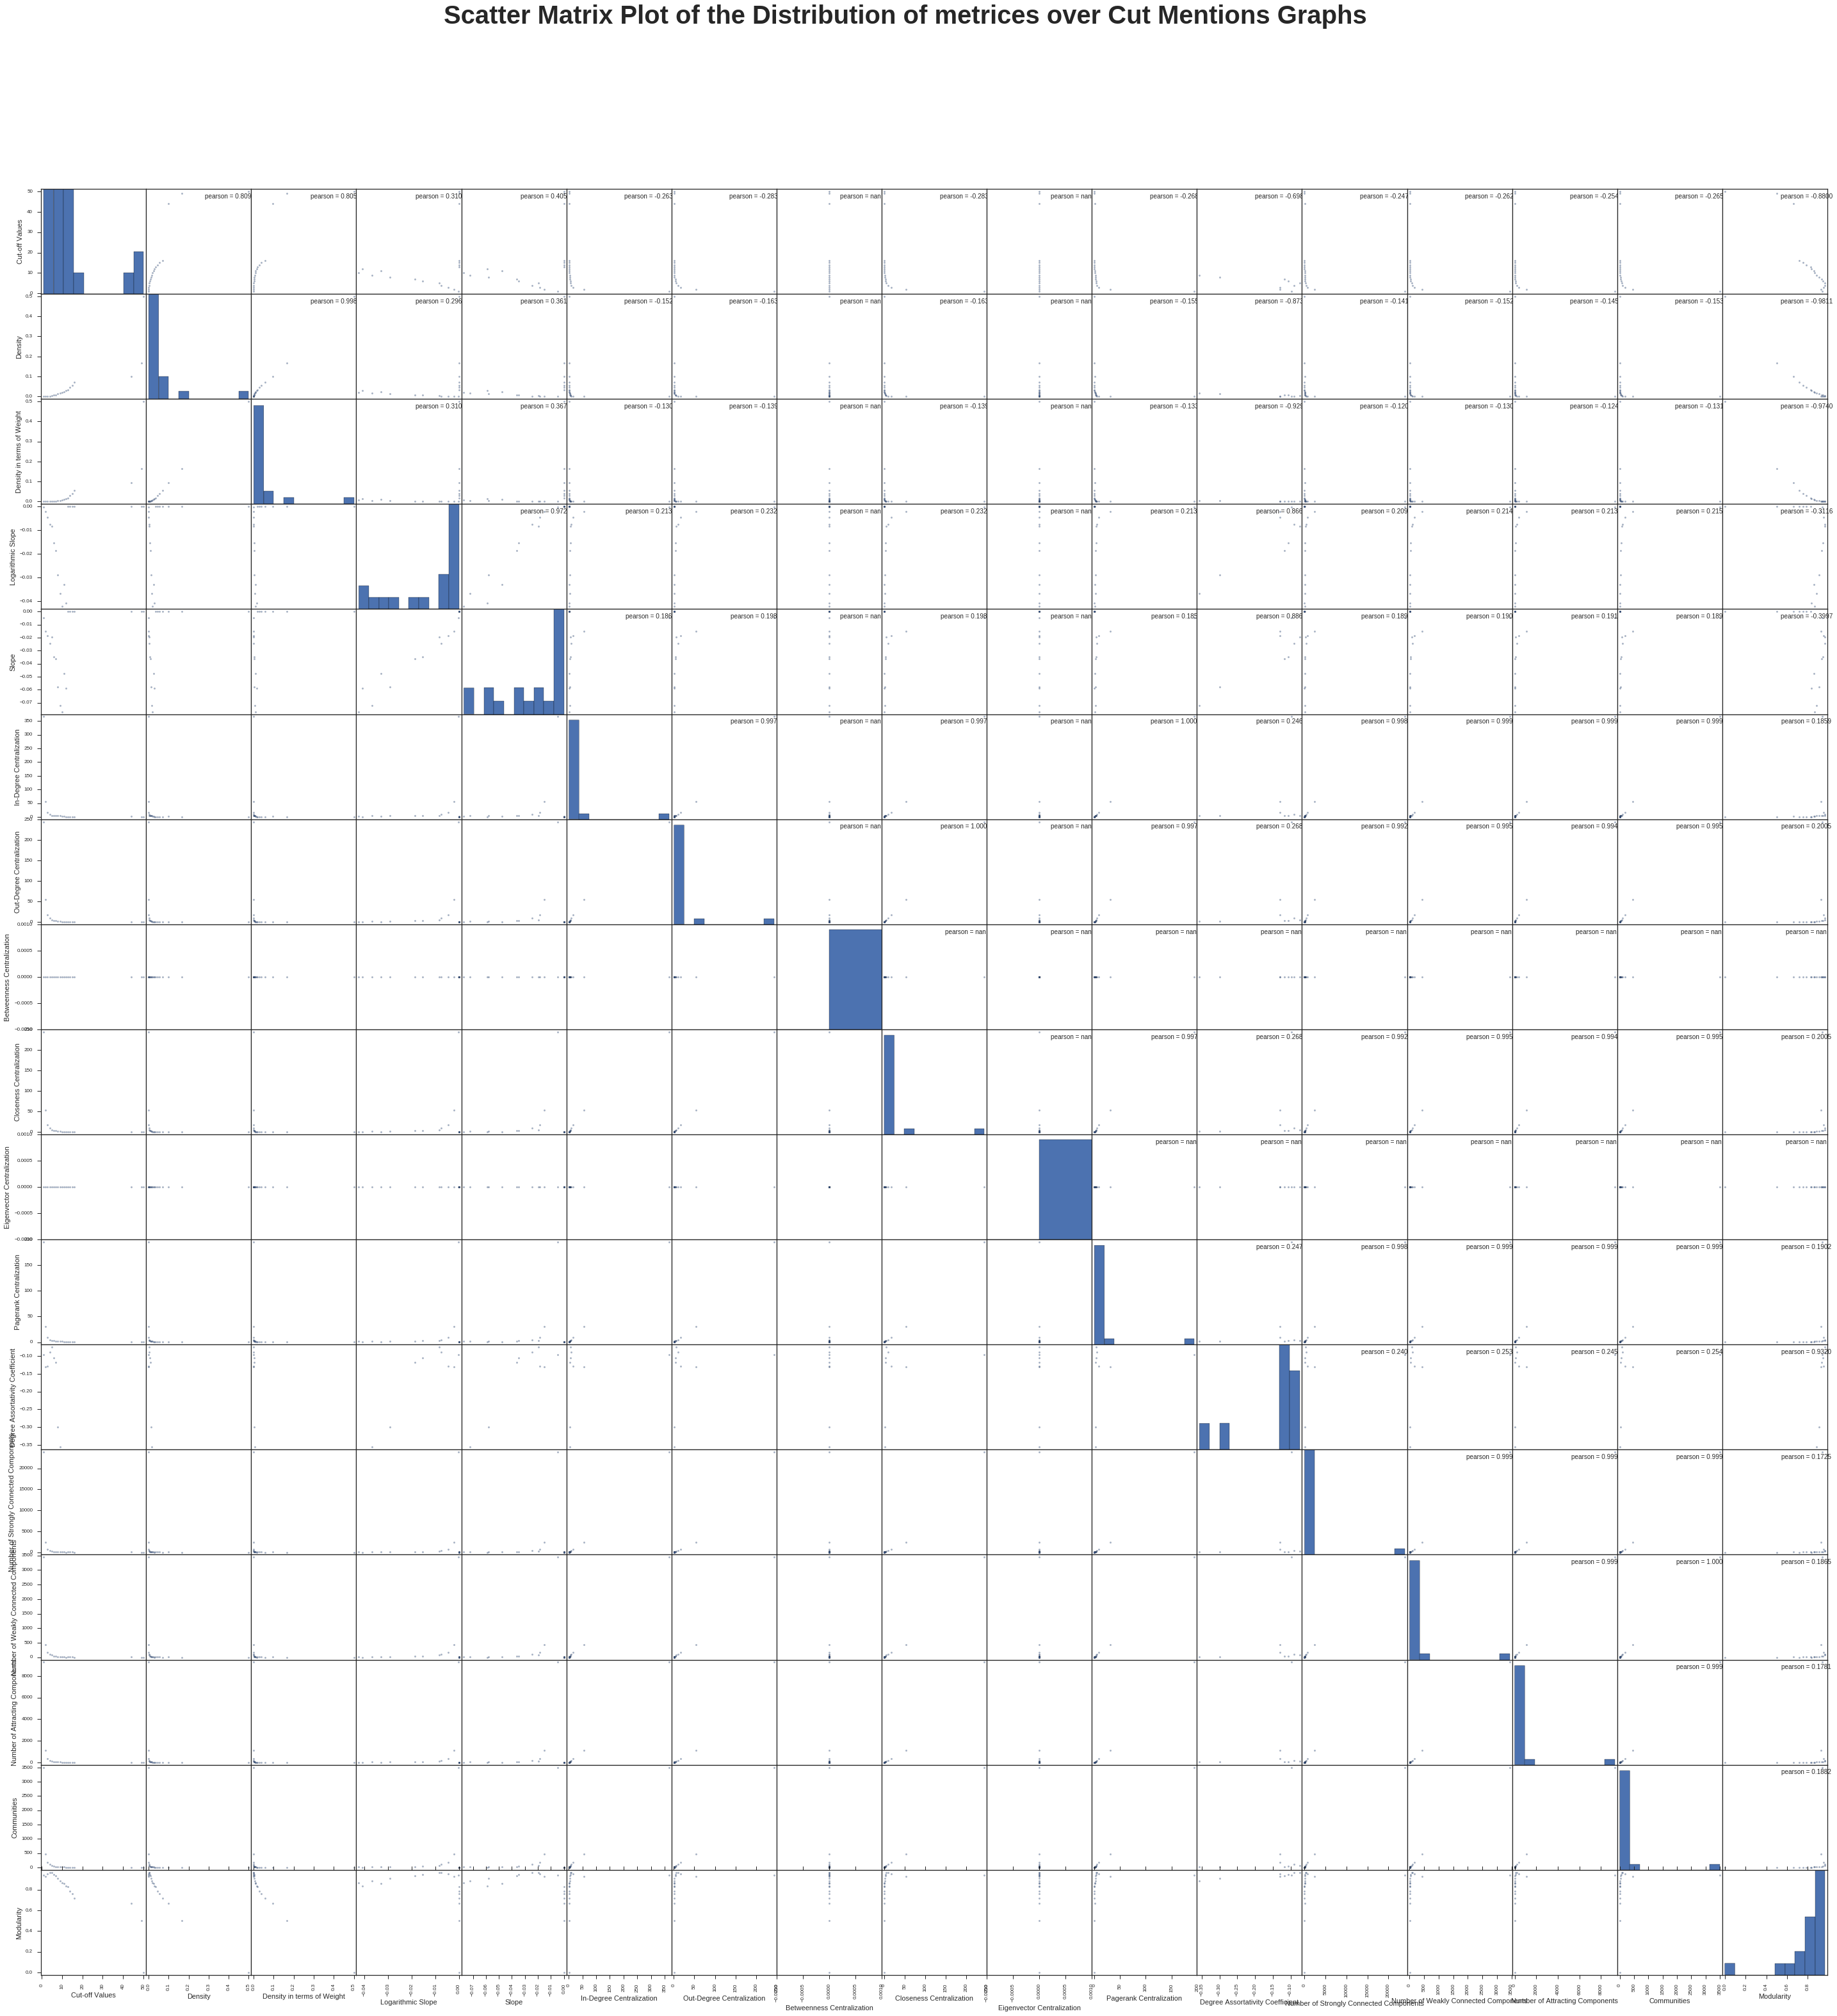

In [6]:
import warnings
warnings.filterwarnings("ignore")
ntei='Scatter Matrix Plot of the Distribution of metrices over Cut Mentions Graphs' 
f, ax = plt.subplots(figsize=(50,50))
sss=scatter_matrix(mydf[['Cut Mentions Graph','Cut-off Values','Density','Density in terms of Weight',
              'Logarithmic Slope',
              'Slope',
              'In-Degree Centralization','Out-Degree Centralization','Betweenness Centralization','Closeness Centralization',
              'Eigenvector Centralization',
              'Pagerank Centralization','Degree Assortativity Coefficient','Number of Strongly Connected Components',
            'Number of Weakly Connected Components','Number of Attracting Components',
              'Communities','Modularity']], alpha=0.5, color='black', diagonal='hist',ax=ax)
plt.suptitle(ntei,fontsize=40,fontweight='bold')
corr = mydf.corr().as_matrix()
for i, j in zip(*plt.np.triu_indices_from(sss, k=1)):
    sss[i, j].annotate("pearson = %.4f" %corr[i,j], (0.8, 0.93), xycoords='axes fraction', ha='center', va='center')
# f.tight_layout()